In [54]:
#Lets import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
Data = pd.read_csv(r"HR.csv")
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [56]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [57]:
Data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [58]:
# Get some information on the types of variables in data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [59]:
Data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Great, we do not have any missing values.

In [60]:
# Print the unique values of the "salary" column
print(Data.salary.unique())

['low' 'medium' 'high']


In [61]:
print(Data['department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [62]:
print(Data['salary'].value_counts())

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [63]:
table = Data.pivot_table(values="satisfaction_level", 
                         index="department", columns="salary",aggfunc=np.count_nonzero)
table


salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


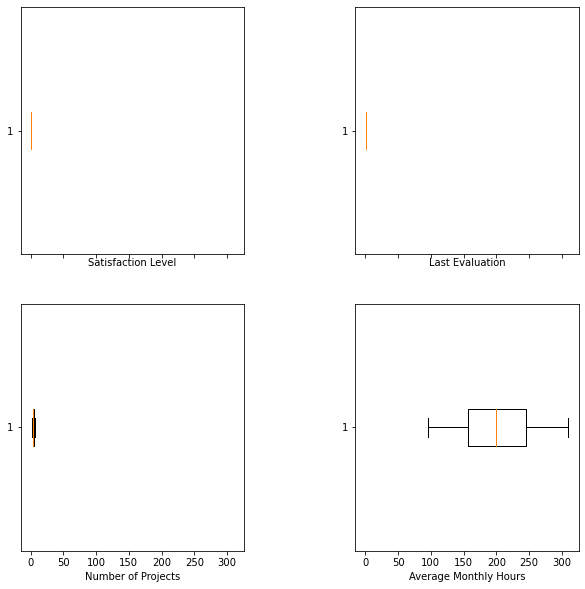

In [64]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

plt.subplots_adjust(wspace=0.5)

# Plot a boxplot of satisfaction_level to see if there are outliers
plt.sca(axes[0, 0])
plt.boxplot(Data['satisfaction_level'], vert=False)
plt.xlabel('Satisfaction Level')

# Plot a boxplot of last_evaluation to see if there are outliers
plt.sca(axes[0, 1])
plt.boxplot(Data['last_evaluation'], vert=False)
plt.xlabel('Last Evaluation')

# Plot a boxplot of number_project to see if there are outliers
plt.sca(axes[1, 0])
plt.boxplot(Data['number_project'], vert=False)
plt.xlabel('Number of Projects')

# Plot a boxplot of average_montly_hours to see if there are outliers
plt.sca(axes[1, 1])
plt.boxplot(Data['average_montly_hours'], vert=False)
plt.xlabel('Average Monthly Hours')

plt.show()

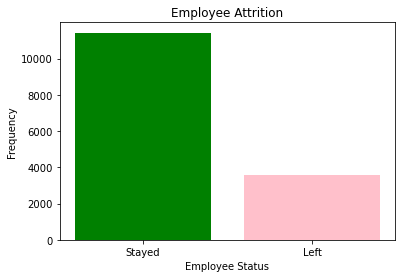

In [65]:
# Count the frequency of the 'left' column values in the 'Data' DataFrame
counts = Data['left'].value_counts()
colors=['green','pink']
# Plot the counts as a bar chart
plt.bar(counts.index, counts.values, color=colors)

# Add labels and title to the plot
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.xlabel('Employee Status')
plt.ylabel('Frequency')
plt.title('Employee Attrition')

plt.show()

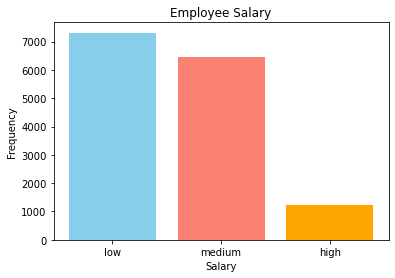

In [66]:
# Count the frequency of the 'salary' column values in the 'Data' DataFrame
counts = Data['salary'].value_counts()
colors = ['skyblue','salmon','orange']
# Plot the counts as a bar chart
plt.bar(counts.index, counts.values, color=colors)

# Add labels and title to the plot
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Employee Salary')

plt.show()

Salary & left

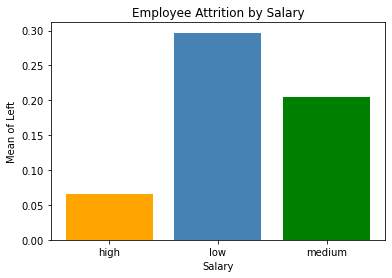

In [67]:
# Group the 'left' column by the 'salary' column and calculate the mean
means = Data.groupby('salary')['left'].mean()

# Set the figure size
plt.figure(figsize=(6, 4))
colors=['orange','steelblue','green']
# Create a bar chart of the means
plt.bar(means.index, means.values, color=colors)

# Set the x-axis and y-axis labels
plt.xlabel('Salary')
plt.ylabel('Mean of Left')

# Set the title of the plot
plt.title('Employee Attrition by Salary')

# Show the plot
plt.show()

We can see that the persons with the low salary are more likely to leave the company

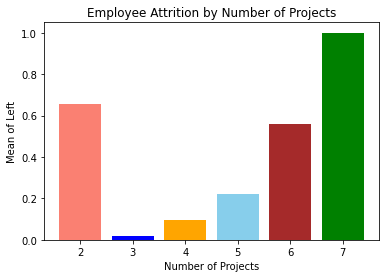

In [68]:
# Group the 'left' column by the 'number_project' column and calculate the mean
means = Data.groupby('number_project')['left'].mean()

# Set the figure size
plt.figure(figsize=(6, 4))
colors=['salmon','blue','orange','skyblue','brown','green']
# Create a bar chart of the means
plt.bar(means.index, means.values, color=colors)

# Set the x-axis and y-axis labels
plt.xlabel('Number of Projects')
plt.ylabel('Mean of Left')

# Set the title of the plot
plt.title('Employee Attrition by Number of Projects')

# Show the plot
plt.show()

Number of project & left

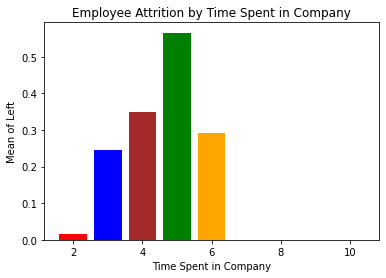

In [69]:
# Group the 'left' column by the 'time_spend_company' column and calculate the mean
means = Data.groupby('time_spend_company')['left'].mean()

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a bar chart of the means
colors=['red','blue','brown','green','orange']
plt.bar(means.index, means.values, color=colors)

# Set the x-axis and y-axis labels
plt.xlabel('Time Spent in Company')
plt.ylabel('Mean of Left')

# Set the title of the plot
plt.title('Employee Attrition by Time Spent in Company')

# Show the plot
plt.show()


time_spend_company, left

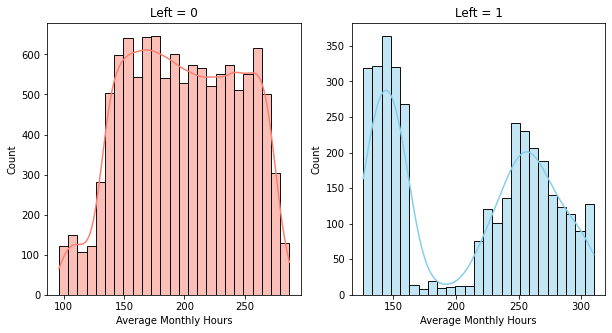

In [70]:
left_0 = Data[Data['left']==0]['average_montly_hours']
left_1 = Data[Data['left']==1]['average_montly_hours']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(left_0, bins=25, kde=True, ax=ax[0], color='salmon')
ax[0].set_xlabel('Average Monthly Hours')
ax[0].set_ylabel('Count')
ax[0].set_title('Left = 0')

sns.histplot(left_1, bins=25, kde=True, ax=ax[1], color='skyblue')
ax[1].set_xlabel('Average Monthly Hours')
ax[1].set_ylabel('Count')
ax[1].set_title('Left = 1')

plt.show()


### EXPLORATORY ANALYSIS


/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: Th

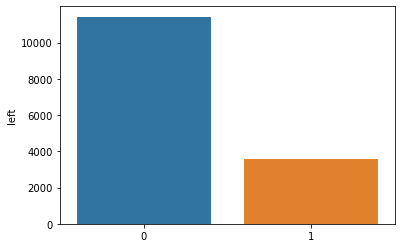

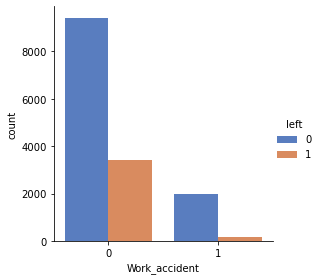

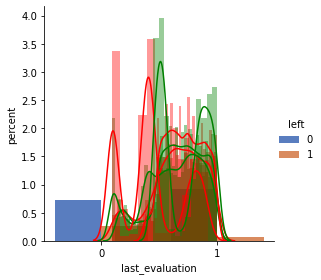

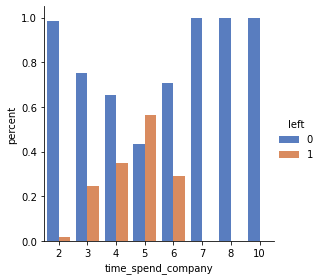

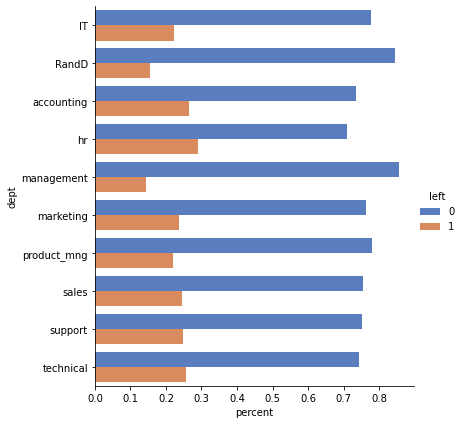

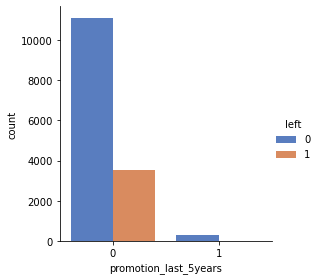

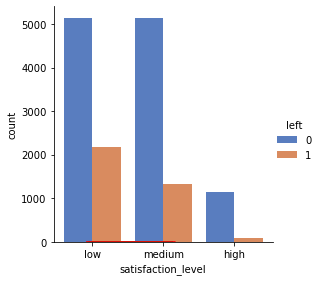

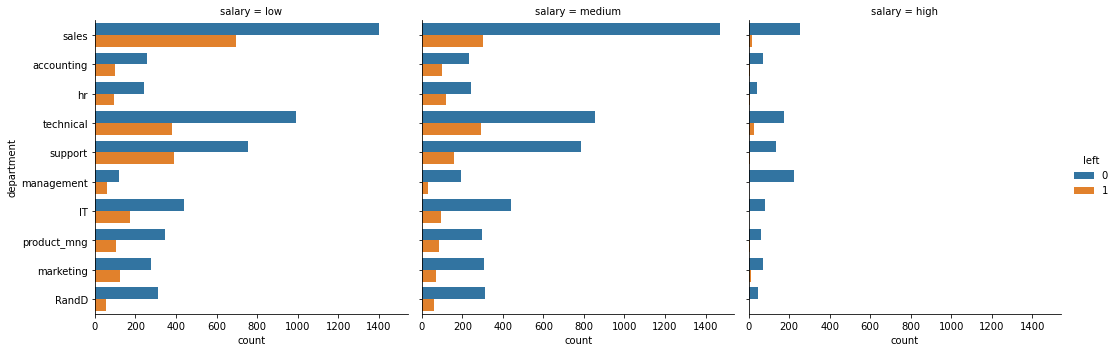

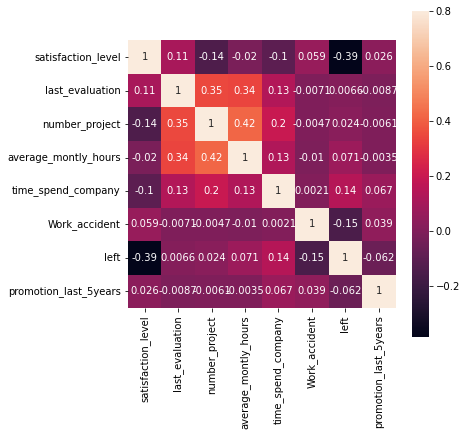

0    12830
1     2169
Name: Work_accident, dtype: int64

In [71]:
import seaborn as sn
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( Data.left.value_counts() )
hr_df = Data
hr_left_df

#1. What is the percentage of churn by salary bucket

salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size().reset_index()
salary_count.columns = ['salary', 'left', 'count']

salary_count

salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size()
salary_percent = salary_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

salary_percent

import matplotlib as plt
import seaborn as sns
%matplotlib inline

sns.barplot( hr_left_df.index, hr_left_df.left )

# 2. How many people, who had work accidents, actually left the company?
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

sn.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_count,
               size=4, kind="bar", palette="muted")


work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

work_accident_percent.columns = ['Work_accident', 'left', 'percent']

sn.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,
               size=4, kind="bar", palette="muted")

#3. How work accidents have impacted the statisfactin level of the empolyees?
sn.distplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'r')
sn.distplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'g')

#4. How satisfaction levels influence whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.left == 1]['satisfaction_level'], color = 'r')

#It can be noted, large number of people who had lower satisfaction levels, have left the company. 
#Especially, people who have satisfaction level less than 0.5. This makes sense. But there is also a surge in 
#at higher level of satisfaction. Need to understand and deal with these employees with a different stategy.

#5. Average satisfaction levels for people who leave and stay back in the company
sl_left_mean = np.mean( hr_df[hr_df.left == 0]['satisfaction_level'] )
sl_left_mean

np.std( hr_df[hr_df.left == 0]['satisfaction_level'] )

np.mean( hr_df[hr_df.left == 1]['satisfaction_level'] )

np.std( hr_df[hr_df.left == 1]['satisfaction_level'] )

### Hypothesis Test: Does lower satisfaction levels lead to people leaving the company
#H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying <br>
#H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying   

from scipy import stats

stats.ttest_ind( hr_df[hr_df.left == 1]['satisfaction_level'], hr_df[hr_df.left == 0]['satisfaction_level'])

#The test establishes that the average satisfaction levels are different.

# 6. How last evaluation scores influencing whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['last_evaluation'], color = 'r')
sn.distplot( hr_df[hr_df.left == 1]['last_evaluation'], color = 'g')

#People with low evaluation and very high evaluation are leaving, where as#
#people with average evaluation scores are staying back. That seems interesting.

# 7. How time spent in company influences attrition?
time_spend_count = hr_df[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percent.columns = ['time_spend_company', 'left', 'percent']

sn.factorplot(x="time_spend_company", y = 'percent', hue="left", data=time_spend_percent,
               size=4, kind="bar", palette="muted")

#People who have spent 2 years are not leaving the company. But as experience grows people start leaving and highest after they spend 5 years in the company. But once they cross the golden years '7', they are not leaving.

# 8. Which department has maximum attrition?

dept_count = hr_df[['department', 'left']].groupby(['department', 'left']).size()
dept_count_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['dept', 'left', 'percent']
sn.factorplot(y="dept",
            x = 'percent',
            hue="left",
            data = dept_count_percent,
            size=6,
            kind="bar",
            palette="muted")

#The percentage of people leaving the company is evenly distributed across all depts. Surprisingly, the percentage is high in HR itself. Lowest in management.

# 9. Effect of whether someone got promoted in last 5 years?
pd.crosstab( hr_df.promotion_last_5years, hr_df.left )

sn.factorplot(x="promotion_last_5years", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

#Very few people who got promoted in last 5 years left the company, compared to people who are not promoted in last 5 years

#10.  How Salary is influencing attrition decisions?
sn.factorplot(x="salary", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

#11. Does higher salary lead to higher satisfaction level?
sn.distplot( hr_df[hr_df.salary == 'low']['satisfaction_level'], color = 'b')
sn.distplot( hr_df[hr_df.salary == 'medium']['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.salary == 'high']['satisfaction_level'], color = 'r')

#12.How salaries across departments are related to attrition?
sn.factorplot( y = "department",
            col="salary",
            hue = "left",
            data=hr_df,
            kind="count",
            size=5)

#No surprises. People with lowers salary have maximum percentage of exodus, while people with higher salary the exodus is least.

# 13. Lets check corrleation between Variables
corrmat = hr_df.corr()
f, ax = plt.pyplot.subplots(figsize=(6, 6))
sn.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.pyplot.show()

# Some key observations:
#Satisfaction level reduces as people spend more time in the company. Also, interestingly when they work on more number of projects. <br>
#Evaluation score is positively correlated with spending more montly hours and number of projects. <br>
#As satisfaction level reduces, people tend to leave company <br>

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

hr_df.columns

hr_df.head()

hr_df.promotion_last_5years.value_counts()

hr_df.Work_accident.value_counts()



In [72]:
Data = hr_df

# Feature Engineering

In [73]:
Data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Here no variables are so much correlated so that we can say that all variables are uncorrelated
so no need to remove any features lets get important features by using Randomforestclassifie

In [74]:
from sklearn.preprocessing import LabelEncoder # For change categorical variable into int
from sklearn.metrics import accuracy_score 
le=LabelEncoder()
Data['salary']=le.fit_transform(Data['salary']) #thats nice!

Data['department']=le.fit_transform(Data['department']) #not Customary decison

In [75]:
# we can select importance features by using Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier


feature_var = Data.loc[:,Data.columns != "left"]
pred_var = Data.loc[:,Data.columns=='left']

model= RandomForestClassifier(n_estimators=100)

model.fit(feature_var,pred_var)

/var/folders/z9/ycphb_jj265fpb6dj9g0syvw0000gn/T/ipykernel_70867/988403223.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(feature_var,pred_var)


RandomForestClassifier()

In [76]:
featimp = pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)
print(featimp)

satisfaction_level       0.327077
time_spend_company       0.189195
number_project           0.189041
average_montly_hours     0.142654
last_evaluation          0.127006
department               0.012140
salary                   0.007932
Work_accident            0.004114
promotion_last_5years    0.000841
dtype: float64


### Machine Learning Models

In [77]:
# Importing Machine learning models library used for classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC


In [78]:
def Classification_model(model,Data,x,y):
    
    # here x is the variable which are used for prediction
    # y is the prediction variable
    
    train,test = train_test_split(Data,test_size= 0.33)
    
    train_x = Data.loc[train.index,x]   # Data for training only with features
    train_y = Data.loc[train.index,y]   # Data for training only with predcition variable
    
    test_x = Data.loc[test.index,x]     # same as for training 
    test_y = Data.loc[test.index,y]
    
    model.fit(train_x,train_y)
    
    pred=model.predict(test_x)
    
    accuracy=accuracy_score(test_y,pred)
    
    return accuracy

In [79]:
#for your knowledge

All_features=['satisfaction_level','number_project','time_spend_company',
              'average_montly_hours','last_evaluation','department',
              'salary','Work_accident','promotion_last_5years']

print(All_features)

Important_features = ['satisfaction_level','number_project','time_spend_company',
                      'average_montly_hours','last_evaluation']


print(Important_features)

Pred_var = ["left"]
print(Pred_var)

['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation', 'department', 'salary', 'Work_accident', 'promotion_last_5years']
['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours', 'last_evaluation']
['left']


In [80]:
# Lets us make a list of models

models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]

Model_Accuracy = []

for model in Classification_models:
    Accuracy=Classification_model(model,Data,All_features,Pred_var)
    Model_Accuracy.append(Accuracy)

/var/folders/z9/ycphb_jj265fpb6dj9g0syvw0000gn/T/ipykernel_70867/3148792375.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x,train_y)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [81]:
Accuracy_with_all_features = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with all features":Model_Accuracy
     
    })

In [82]:
Accuracy_with_all_features.sort_values(by="Accuracy with all features",ascending=False).reset_index(drop=True)

,Classification Model,Accuracy with all features
0,RandomForestClassifier,0.991313
1,KNN,0.929293
2,Gaussian Naive Bays,0.783232
3,Logistic_Regression,0.771919
4,Support_Vector,0.771111


#### Observation 

1. The Random Forest is at the top followed by Support_vector and KNN

2. These all are giving accuracy more than 90% for validation data i.e. test data that is not bad

3. In Next we will try same with but only with important features suggested by RandomForest 

In [83]:
# Lets try with Important features

Model_Accuracy = []

for model in Classification_models:
    Accuracy=Classification_model(model,Data,Important_features,Pred_var) # Just instead of all features give only important features
    Model_Accuracy.append(Accuracy)

/var/folders/z9/ycphb_jj265fpb6dj9g0syvw0000gn/T/ipykernel_70867/3148792375.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x,train_y)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [84]:
Accuracy_with_important_features = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with Important features":Model_Accuracy
     
    })
Accuracy_with_important_features.sort_values(by="Accuracy with Important features",ascending=False).reset_index(drop=True)

,Classification Model,Accuracy with Important features
0,RandomForestClassifier,0.986667
1,KNN,0.950909
2,Gaussian Naive Bays,0.814949
3,Support_Vector,0.787273
4,Logistic_Regression,0.776162


1. By using the important features there is a slight increase in accuracy for all classification models

2. The gaussian navie bays and KNN show a increase of 2 % in accuracy

### Machine Learning Models With Cross Validation

1. In this we will do the cross validation with the models to get there mean accuracy

2. From 3.1 we came to know that by using important features there is increase in the accuracy for all models so in this we will go only with important features

In [85]:
from sklearn.model_selection import cross_val_score # This is used for to caculate the score of cross validation by using Kfold

def Classification_model_CV(model,Data,x,y):
    
    # here x is the variable which are used for prediction
    # y is the prediction variable
    
    data_x = Data.loc[:,x]
    # Here no need of training and test data because in cross validation it splits data into 
    # train and test itself # data_x repersent features
    
    data_y = Data.loc[:,y] # data for predication

    
    scores= cross_val_score(model,data_x,data_y,scoring="accuracy",cv=10)
    
    print(scores) # print the scores
    
    print('')
    
    accuracy=scores.mean()
    return accuracy

In [86]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]

Model_Accuracy = []

for model,z in zip(Classification_models,models):
    
    print(z) # Print the name of model
    print('')
    
    Accuracy=Classification_model_CV(model,Data,Important_features,Pred_var)
    
    Model_Accuracy.append(Accuracy)

RandomForestClassifier



/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[0.99866667 0.998      0.98266667 0.98       0.97866667 0.99466667
 0.99866667 0.99866667 0.99933333 1.        ]

Gaussian Naive Bays

[0.814      0.79       0.82666667 0.81       0.806      0.80266667
 0.80733333 0.78866667 0.80133333 0.7838559 ]

KNN



/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

[0.956      0.94933333 0.95466667 0.95       0.95133333 0.95
 0.96       0.95066667 0.96266667 0.95997332]

Logistic_Regression



/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

[0.77733333 0.76933333 0.77866667 0.77866667 0.78666667 0.77866667
 0.776      0.76066667 0.71       0.6897932 ]

Support_Vector



/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

[0.788      0.78133333 0.79066667 0.786      0.77933333 0.78333333
 0.78533333 0.78533333 0.78666667 0.78052035]



In [87]:
Accuracy_with_CV = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with CV":Model_Accuracy
     
    })
Accuracy_with_CV.sort_values(by="Accuracy with CV",ascending=False).reset_index(drop=True)

,Classification Model,Accuracy with CV
0,RandomForestClassifier,0.992933
1,KNN,0.954464
2,Gaussian Naive Bays,0.803052
3,Support_Vector,0.784652
4,Logistic_Regression,0.760579


### Machine Learning Models With Parameter tuning

1. In this we will use  Grid SearchCV to find the best parameter for a model 

2. in this we will use important features too

In [88]:
from sklearn.model_selection import GridSearchCV 
def Classification_model_GridSearchCV(model,Data,x,y,params):
    
    # here params repersent Parameters
    data_x = Data.loc[:,x]  
    data_y = Data.loc[:,y] 
    clf = GridSearchCV(model,params,scoring="accuracy",cv=5)
    
    clf.fit(data_x,data_y)
    
    print("best score is :")
    print(clf.best_score_)
    print('')
    print("best estimator is :")
    print(clf.best_estimator_)

    return (clf.best_score_)

In [89]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

Model_Accuracy=[]

model = RandomForestClassifier()

param_grid = {'n_estimators':(70,80,90,100),'criterion':('gini','entropy'),'max_depth':[25,30]}

Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)

Model_Accuracy.append(Accuracy)

/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

best score is :
0.9917329554295875

best estimator is :
RandomForestClassifier(max_depth=30)


In [90]:
model = GB()
param_grid={}
Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

best score is :
0.7924477714793821

best estimator is :
GaussianNB()


/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [91]:
model=knn()
param_grid={'n_neighbors':[5,15],'weights':('uniform','distance'),'p':[1,5]}
Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d ar

best score is :
0.960730154495943

best estimator is :
KNeighborsClassifier(p=5, weights='distance')


/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [92]:
model=LogisticRegression()
param_grid={'C': [0.01,0.1,1,10],'penalty':('l1','l2')}
Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

best score is :
0.7449067689229744

best estimator is :
LogisticRegression(C=0.1)


/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------------------------------------------------

In [96]:
model=SVC()
param_grid={'C': [1,10,20,100],'gamma':[0.1,1,10]} 
Accuracy=Classification_model_GridSearchCV(model,Data,Important_features,Pred_var,param_grid)
Model_Accuracy.append(Accuracy)

/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

best score is :
0.975999510948094

best estimator is :
SVC(C=20, gamma=10)


In [97]:
Accuracy_with_GridSearchCV = pd.DataFrame(
    { "Classification Model" :models,
     "Accuracy with GridSearchCV":Model_Accuracy
     
    })
Accuracy_with_GridSearchCV.sort_values(by="Accuracy with GridSearchCV",ascending=False).reset_index(drop=True)

,Classification Model,Accuracy with GridSearchCV
0,RandomForestClassifier,0.991733
1,Support_Vector,0.976000
2,KNN,0.960730
3,Gaussian Naive Bays,0.792448
4,Logistic_Regression,0.744907


In [98]:
Comparison=pd.merge(pd.merge(pd.merge(Accuracy_with_all_features,Accuracy_with_important_features,on='Classification Model'),Accuracy_with_CV,on='Classification Model'),Accuracy_with_GridSearchCV,on='Classification Model')

In [99]:
Comparison1=Comparison.loc[:,["Classification Model","Accuracy with all features","Accuracy with Important features","Accuracy with CV","Accuracy with GridSearchCV"]]

In [100]:
Comparison1

,Classification Model,Accuracy with all features,Accuracy with Important features,Accuracy with CV,Accuracy with GridSearchCV
0,RandomForestClassifier,0.991313,0.986667,0.992933,0.991733
1,Gaussian Naive Bays,0.783232,0.814949,0.803052,0.792448
2,KNN,0.929293,0.950909,0.954464,0.960730
3,Logistic_Regression,0.771919,0.776162,0.760579,0.744907
4,Support_Vector,0.771111,0.787273,0.784652,0.976000
